In [2]:
# importing req libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
# loading dataset
df = pd.read_csv("n_movies.csv")

In [4]:
# display first 5 rows
df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [5]:
# display input features
df.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')

In [6]:
# checking number of rows and columns
df.shape

(9957, 9)

In [7]:
# Checking data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [8]:
# Statistical summary of numerical columns
df.describe()

,rating
count,8784.000000
mean,6.764515
std,1.214840
min,1.700000
25%,6.100000
50%,6.900000
75%,7.600000
max,9.900000


In [9]:
# Statistical summary of categorical columns
df.describe(include='object')

,title,year,certificate,duration,genre,description,stars,votes
count,9957,9430,6504,7921,9884,9957,9957,8784
unique,7912,498,20,291,569,9433,8615,4862
top,Top Gear,(2020),TV-MA,60 min,Comedy,Add a Plot,[],30
freq,92,663,2520,385,859,434,403,33


In [10]:
# Checking missing values in each column
df.isnull().sum()

title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
description       0
stars             0
votes          1173
dtype: int64

In [11]:
(df.isnull().sum()/len(df))*100

title           0.000000
year            5.292759
certificate    34.679120
duration       20.447926
genre           0.733153
rating         11.780657
description     0.000000
stars           0.000000
votes          11.780657
dtype: float64

In [12]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [13]:
df['year'].head(10)

0       (2018– )
1       (2016– )
2    (2015–2022)
3         (2022)
4       (2022– )
5       (2022– )
6       (2013– )
7    (2008–2013)
8       (2022– )
9         (2022)
Name: year, dtype: object

Extracting numeric year from string and converting to numeric


In [14]:
df['year_clean'] = df['year'].str.extract(r'(\d{4})')

In [15]:
df['year_clean'] = pd.to_numeric(df['year_clean'],errors='coerce')

In [16]:
# Filling missing year values using median
df['year_clean'].fillna(df['year_clean'].median(),inplace=True)

In [17]:
df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes,year_clean
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",2018.0
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",2016.0
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",2015.0
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",2022.0
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",2022.0


In [18]:
# removing year columns and rename 
df.drop(columns=['year'],inplace=True)
df.rename(columns={'year_clean':'year'},inplace=True)

In [19]:
df.head()

,title,certificate,duration,genre,rating,description,stars,votes,year
0,Cobra Kai,TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",2018.0
1,The Crown,TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",2016.0
2,Better Call Saul,TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",2015.0
3,Devil in Ohio,TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",2022.0
4,Cyberpunk: Edgerunners,TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",2022.0


In [20]:
# Filling missing certificate values with 'Not Rated'
df['certificate'].fillna("Not Rated",inplace=True)

In [21]:
df['duration'].head(20)

0      30 min
1      58 min
2      46 min
3     356 min
4      24 min
5      45 min
6      23 min
7      49 min
8      45 min
9     166 min
10     51 min
11     89 min
12     44 min
13    139 min
14    118 min
15    110 min
16    118 min
17     60 min
18     60 min
19        NaN
Name: duration, dtype: object

In [22]:
df['duration'].value_counts().head(20)

duration
60 min     385
24 min     295
30 min     265
45 min     211
90 min     193
25 min     185
23 min     161
50 min     153
42 min     141
22 min     138
95 min     115
100 min    104
97 min     104
96 min     104
92 min     101
94 min      94
44 min      92
85 min      91
101 min     88
70 min      88
Name: count, dtype: int64

In [23]:
df['duration'] = df['duration'].astype(str).str.lower().str.strip()

 Extracting duration in minutes and converting to numeric


In [24]:
df['duration_min'] = df['duration'].str.extract(r'(\d+)')

In [25]:
df['duration_min']=pd.to_numeric(df['duration_min'],errors='coerce')

In [26]:
# Filling missing duration values with median
df['duration_min'].fillna(df['duration_min'].median(),inplace=True)

In [27]:
df.head()

,title,certificate,duration,genre,rating,description,stars,votes,year,duration_min
0,Cobra Kai,TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",2018.0,30.0
1,The Crown,TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",2016.0,58.0
2,Better Call Saul,TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",2015.0,46.0
3,Devil in Ohio,TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",2022.0,356.0
4,Cyberpunk: Edgerunners,TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",2022.0,24.0


In [28]:
df.drop(columns=['duration'],inplace=True)
df.rename(columns={'duration_min':'duration'},inplace=True)

In [29]:
df.head()

,title,certificate,genre,rating,description,stars,votes,year,duration
0,Cobra Kai,TV-14,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",2018.0,30.0
1,The Crown,TV-MA,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",2016.0,58.0
2,Better Call Saul,TV-MA,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",2015.0,46.0
3,Devil in Ohio,TV-MA,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",2022.0,356.0
4,Cyberpunk: Edgerunners,TV-MA,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",2022.0,24.0


In [30]:
# Filling missing genre values with most frequent genre
df['genre'].fillna(df['genre'].mode()[0],inplace=True)

In [31]:
# Filling missing ratings using median
df['rating'].fillna(df['rating'].median(),inplace=True)

In [32]:
df['description'].fillna("No description available",inplace=True)

In [33]:
df.isnull().sum()

title             0
certificate       0
genre             0
rating            0
description       0
stars             0
votes          1173
year              0
duration          0
dtype: int64

 Removing commas, converting votes to numeric, and filling missing votes with 0


In [34]:
df['votes']=df['votes'].astype(str).str.replace(',','', regex=False)

In [35]:
df['votes']=pd.to_numeric(df['votes'],errors='coerce')

In [36]:
df['votes'].isnull().sum()

np.int64(1173)

In [37]:
df['votes'].fillna(0,inplace=True)

In [38]:
df['votes'].dtype
df['votes'].describe()

count    9.957000e+03
mean     1.722323e+04
std      8.249809e+04
min      0.000000e+00
25%      1.300000e+02
50%      8.420000e+02
75%      4.260000e+03
max      1.844075e+06
Name: votes, dtype: float64

In [39]:
df.head()

,title,certificate,genre,rating,description,stars,votes,year,duration
0,Cobra Kai,TV-14,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0,2018.0,30.0
1,The Crown,TV-MA,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0,2016.0,58.0
2,Better Call Saul,TV-MA,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0,2015.0,46.0
3,Devil in Ohio,TV-MA,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0,2022.0,356.0
4,Cyberpunk: Edgerunners,TV-MA,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0,2022.0,24.0


In [40]:
df.isnull().sum()

title          0
certificate    0
genre          0
rating         0
description    0
stars          0
votes          0
year           0
duration       0
dtype: int64

## Univariate Analysis

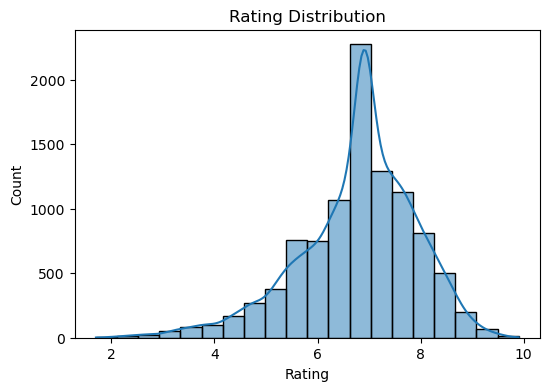

In [41]:
plt.figure(figsize=(6,4))
sns.histplot(df['rating'],bins=20,kde=True)
plt.title("Rating Distribution")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

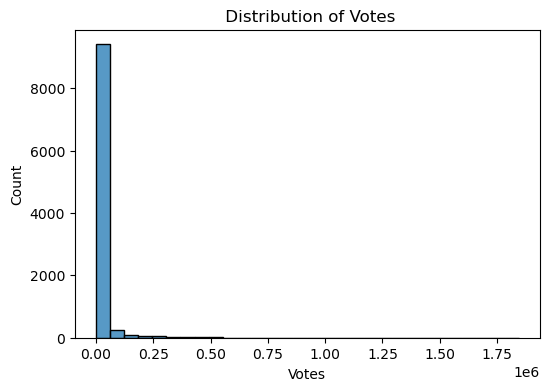

In [42]:
plt.figure(figsize=(6,4))
sns.histplot(df['votes'],bins=30)
plt.title(" Distribution of Votes")
plt.xlabel('Votes')
plt.ylabel('Count')
plt.show()

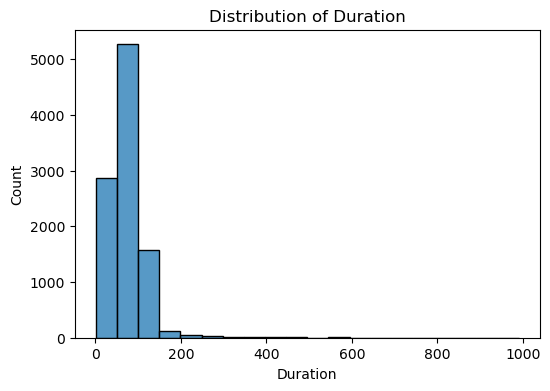

In [43]:
plt.figure(figsize=(6,4))
sns.histplot(df['duration'],bins=20)
plt.title("Distribution of Duration")
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

In [44]:
df['genre'].value_counts().head(10)

genre
Comedy                          932
Drama                           587
Animation, Action, Adventure    553
Documentary                     518
Comedy, Drama                   284
Crime, Drama, Mystery           247
Drama, Romance                  247
Comedy, Drama, Romance          209
Reality-TV                      192
Action, Crime, Drama            179
Name: count, dtype: int64

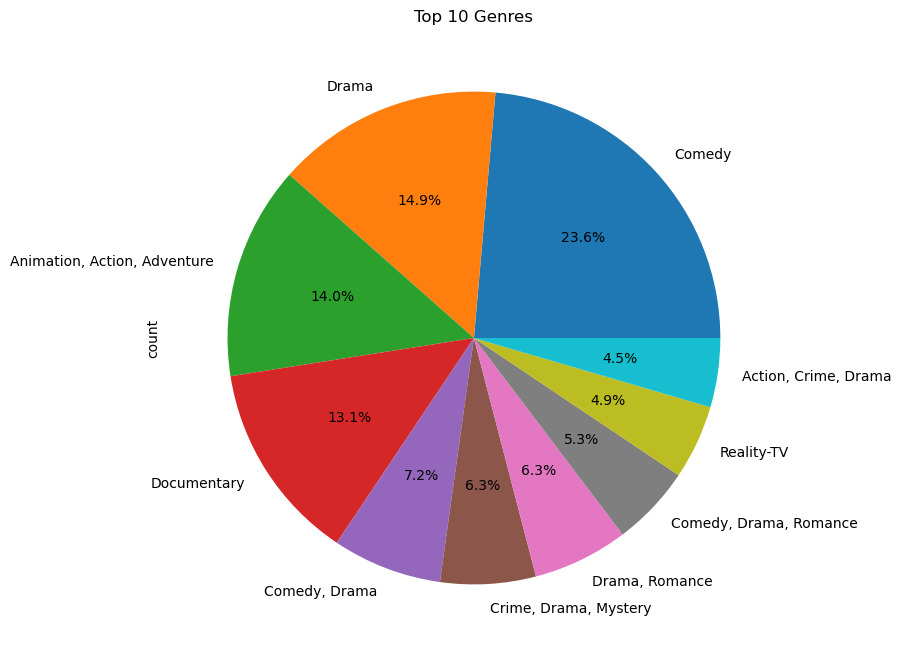

In [60]:
plt.figure(figsize=(8,8))
df['genre'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title("Top 10 Genres")
plt.show()

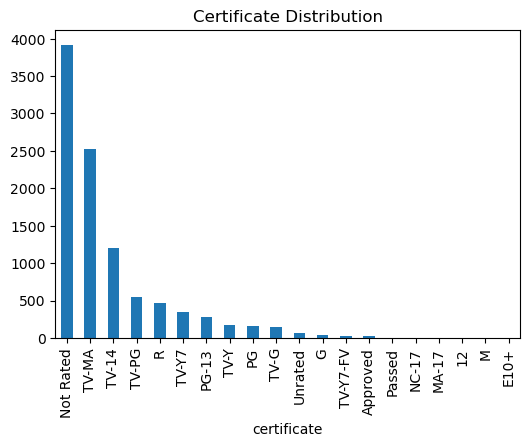

In [46]:
plt.figure(figsize=(6,4))
df['certificate'].value_counts().plot(kind='bar')
plt.title("Certificate Distribution")
plt.show()

## Bivariate Analysis

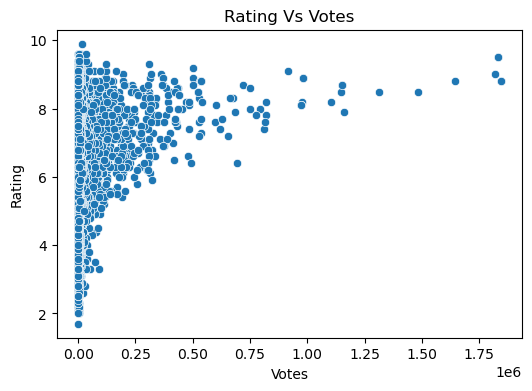

In [47]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='votes' , y='rating',data=df)
plt.title("Rating Vs Votes")
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

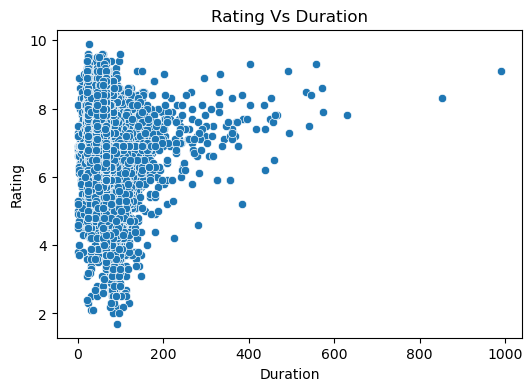

In [48]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='duration' , y='rating',data=df)
plt.title("Rating Vs Duration")
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.show()

In [49]:
top_genres=df['genre'].value_counts().head(10).index
df_top=df[df['genre'].isin(top_genres)]

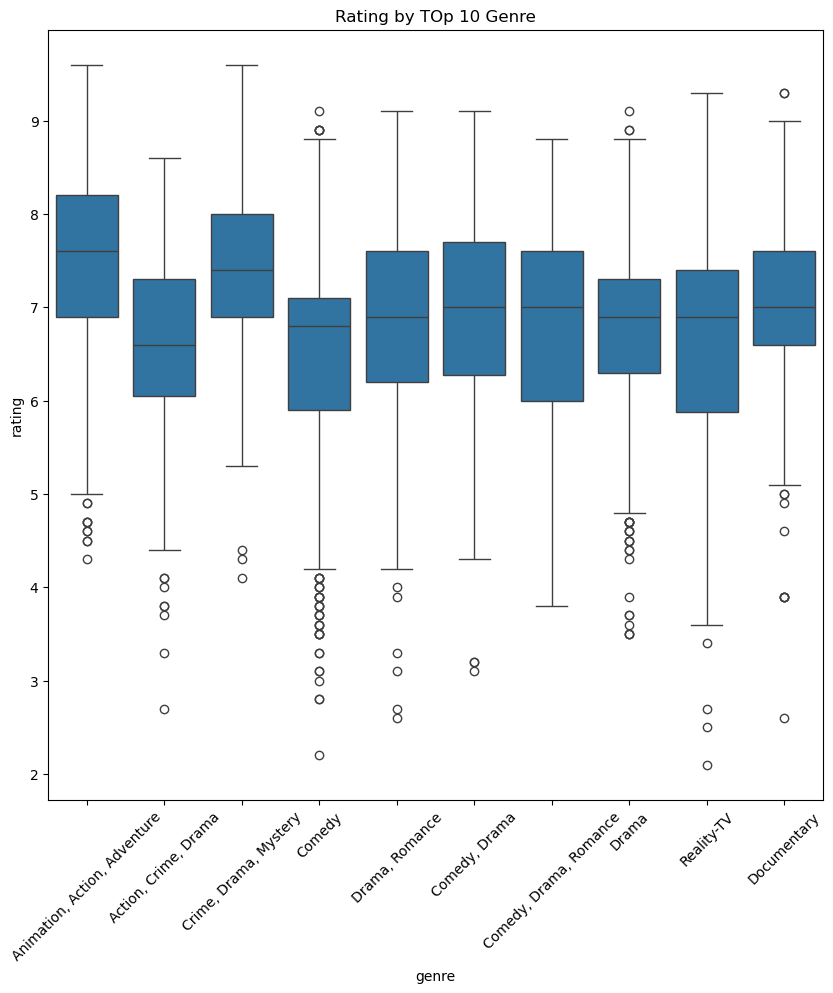

In [50]:
plt.figure(figsize=(10,10))
sns.boxplot(x='genre',y='rating',data=df_top)
plt.xticks(rotation=45)
plt.title('Rating by TOp 10 Genre')
plt.show()

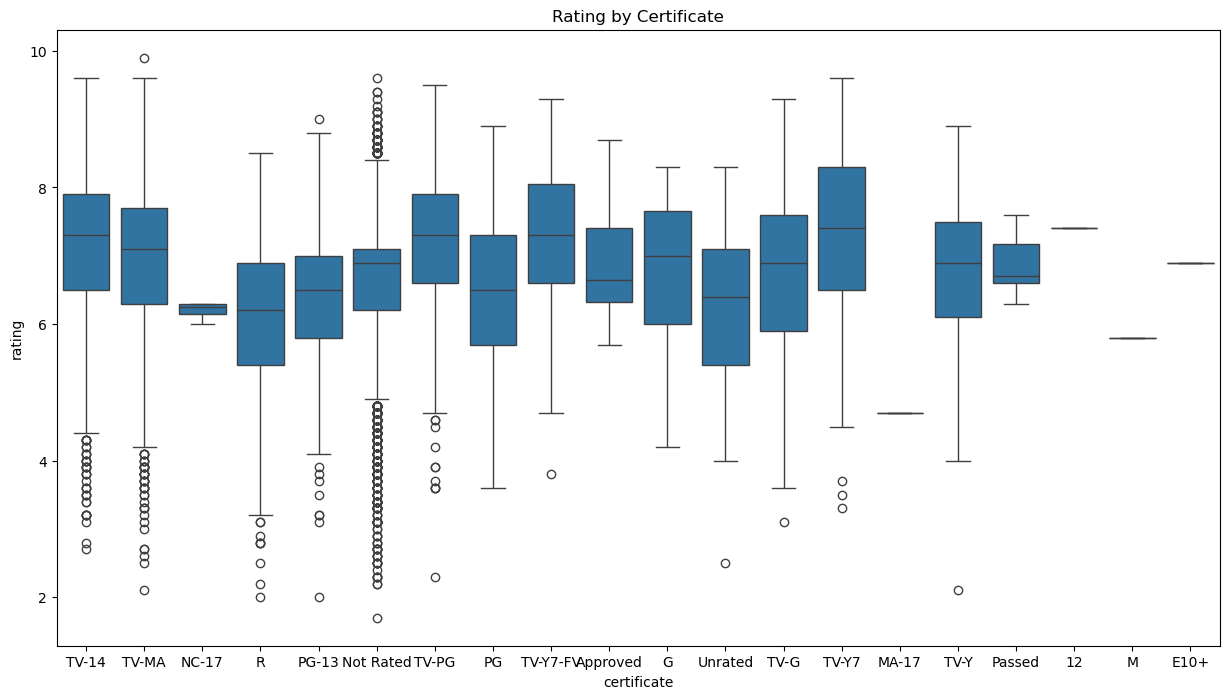

In [51]:
plt.figure(figsize=(15,8))
sns.boxplot(x='certificate',y='rating',data=df)
plt.title('Rating by Certificate')
plt.show()

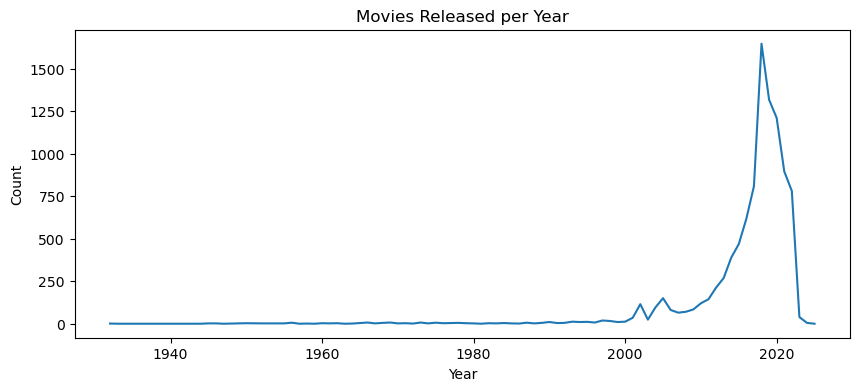

In [52]:
df['year'].value_counts().sort_index().plot(figsize=(10,4))
plt.title('Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## Multivariate Analysis

In [53]:
num_df=df[['rating','votes','duration','year']]

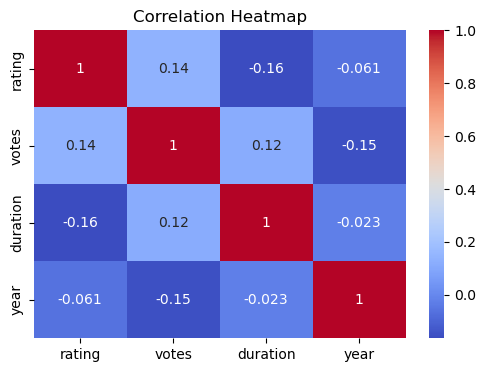

In [54]:
# Multivariate analysis: correlation between numerical features
plt.figure(figsize=(6,4))
sns.heatmap(num_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

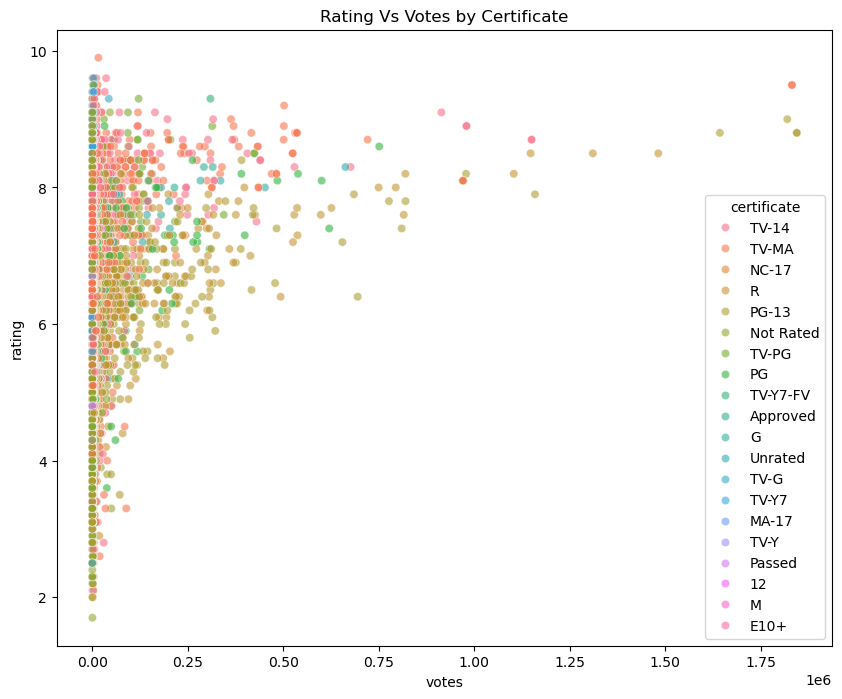

In [55]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x='votes',
    y='rating',
    hue='certificate',
    data=df,
    alpha=0.6
)
plt.title("Rating Vs Votes by Certificate")
plt.show()

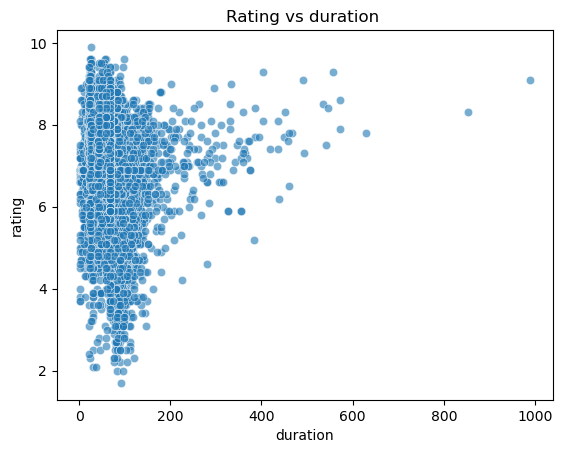

In [56]:
plt.Figure(figsize=(6,4))
sns.scatterplot(
    x='duration',
    y='rating',
    sizes=(20,30),
    data=df,
    alpha=0.6
)
plt.title('Rating vs duration ')
plt.show()